<a href="https://colab.research.google.com/github/AshwinCarvalho999/EDA-on-Hotel-Booking-analysis-project/blob/main/ASHWIN_CARVALHO_CAPSTONE_PROJECT_MOBILE_PRICE_RANGE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CAPSTONE PROJECT MOBILE PRICE RANGE** **PREDICTION**

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone
(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description :-

Battery_power - Total energy a battery can store in one time measured in mAh.

Blue - Has bluetooth or not.

Clock_speed - speed at which microprocessor executes instructions.

Dual_sim - Has dual sim support or not.

Fc - Front Camera mega pixels.

Four_g - Has 4G or not.

Int_memory - Internal Memory in Gigabytes.

M_dep - Mobile Depth in cm.

Mobile_wt - Weight of mobile phone.

N_cores - Number of cores of processor.

Pc - Primary Camera mega pixels.

Px_height - Pixel Resolution Height.

Px_width - Pixel Resolution Width.

Ram - Random Access Memory in Mega Bytes.

Sc_h - Screen Height of mobile in cm.

Sc_w - Screen Width of mobile in cm.

Talk_time - longest time that a single battery charge will last when you are.

Three_g - Has 3G or not.

Touch_screen - Has touch screen or not.

Wifi - Has wifi or not.

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost),

2(high cost) and 3(very high cost).

In [ ]:
#importing the important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')


In [ ]:
dataset.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

**DATA** **ANALYSIS**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
dataset.describe()

battery_power       blue  ...         wifi  price_range
count    2000.000000  2000.0000  ...  2000.000000  2000.000000
mean     1238.518500     0.4950  ...     0.507000     1.500000
std       439.418206     0.5001  ...     0.500076     1.118314
min       501.000000     0.0000  ...     0.000000     0.000000
25%       851.750000     0.0000  ...     0.000000     0.750000
50%      1226.000000     0.0000  ...     1.000000     1.500000
75%      1615.250000     1.0000  ...     1.000000     2.250000
max      1998.000000     1.0000  ...     1.000000     3.000000

[8 rows x 21 columns]

**DATA VISUALIZATION**

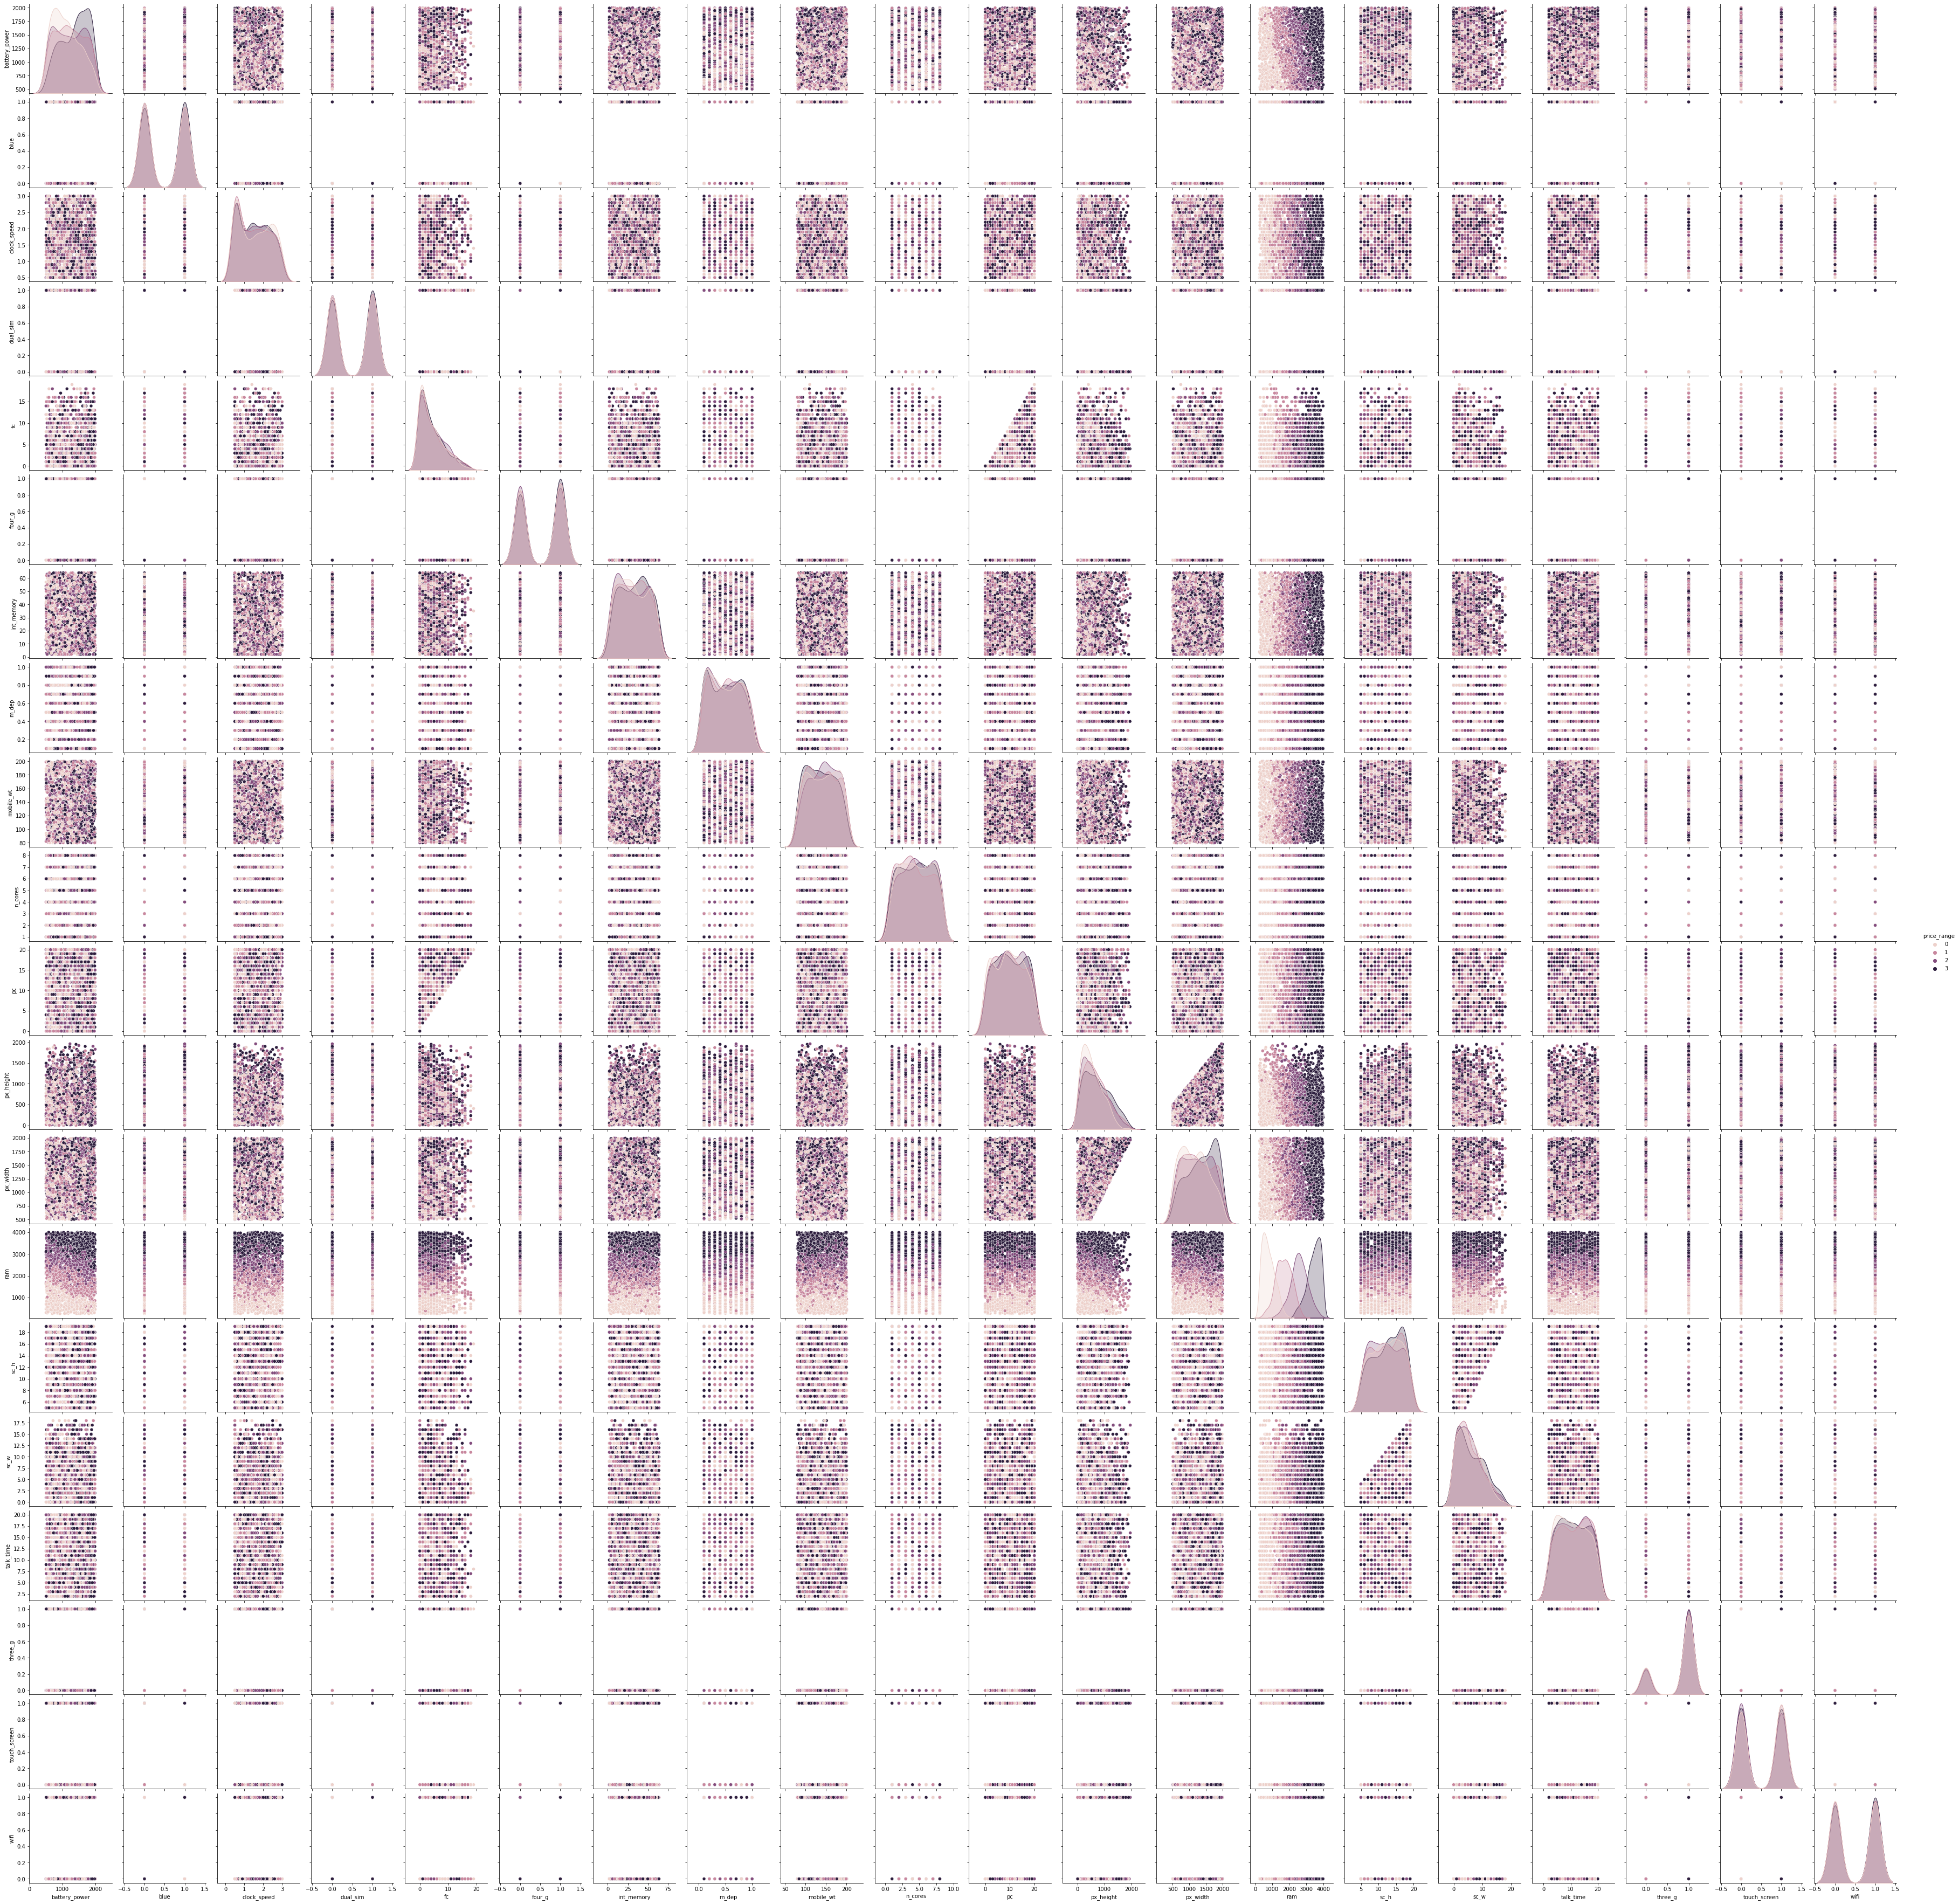

In [ ]:
#creating pairplot for price_range
sns.pairplot(dataset,hue='price_range')

VISUALIZING HOW DOES RAM IS AFFECTED BY PRICE

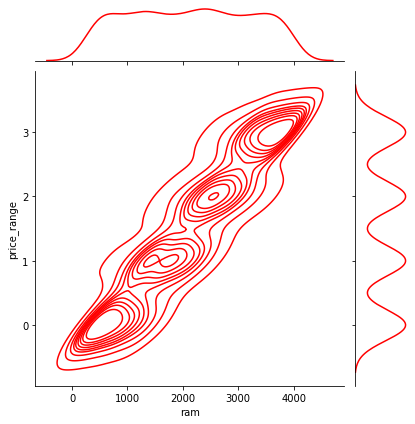

In [ ]:
#creating jointplot
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde')

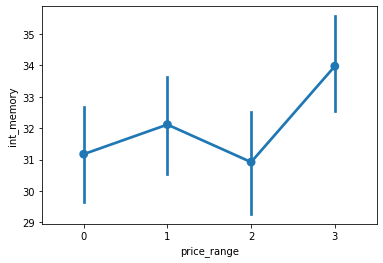

In [ ]:
#creating pointplot
sns.pointplot(y="int_memory", x="price_range", data=dataset)

% **of** **mobiles** **which** **support** **3G**

In [ ]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

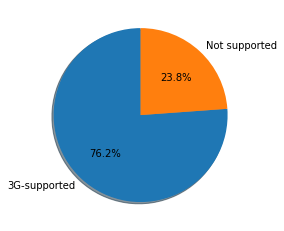

In [ ]:
#creating the piechart
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

**% of mobiles which support 4G**

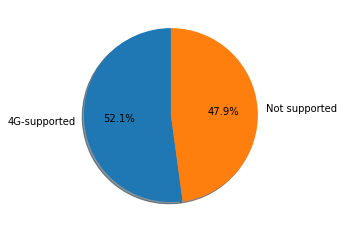

In [ ]:
#creating the piechart
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

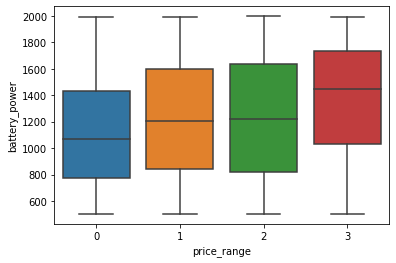

In [ ]:
#creating a box plot for finding out price_range upon battery_power
sns.boxplot(x="price_range", y="battery_power", data=dataset)

**No of Phones vs Camera megapixels of front and primary camera**

Text(0.5, 0, 'MegaPixels')

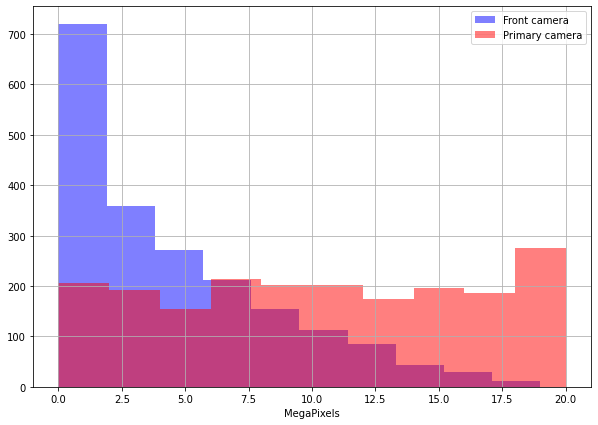

In [ ]:
plt.figure(figsize=(10,7))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

**Mobile Weght vs Price range**

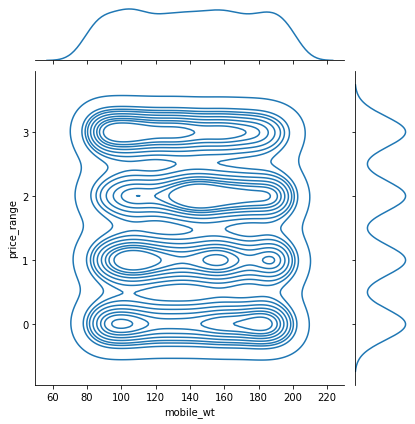

In [ ]:
#creating the jointplot for mobile_wt upon price_range
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde')

**Talk time vs Price range**

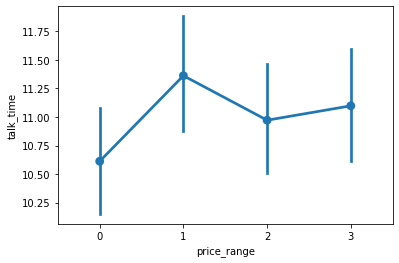

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

**X & Y ARRAY**

In [ ]:
X=dataset.drop('price_range',axis=1)

In [ ]:
y=dataset['price_range']

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Creating & Training Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(X_test,y_test)

0.9132801488185277

**Creating & Training KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.9212121212121213

**`Elbow Method For optimum value of K`**

In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

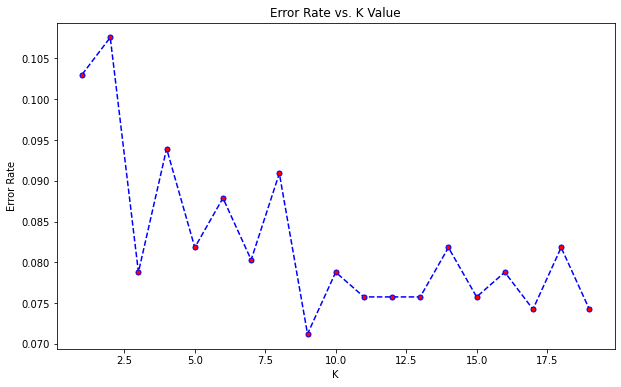

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Creating & Training Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logmodel.score(X_test,y_test)

0.6181818181818182

**Creating & Training Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree.score(X_test,y_test)

0.8166666666666667

***Creating & Training Random Tree Model***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(X_test,y_test)

0.8742424242424243

**Conclusion: KNN & Linear Regression performed the best score**

In [ ]:
y_pred=lm.predict(X_test)

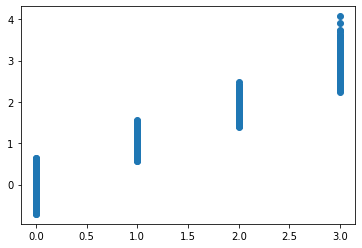

In [ ]:
plt.scatter(y_test,y_pred)

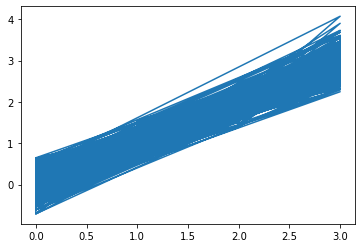

In [ ]:
plt.plot(y_test,y_pred)

**RESULT: KNN**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [ ]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


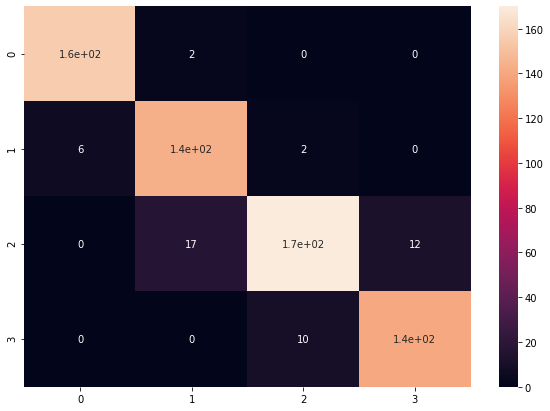

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

**Price prediction of Mobiles Using KNN for Prediction**

In [ ]:
data_test=pd.read_csv('/content/drive/MyDrive/ mobile price prediction test (1).csv')

In [ ]:
data_test.head()

id  battery_power  blue  clock_speed  ...  talk_time  three_g  touch_screen  wifi
0   1           1043     1          1.8  ...          2        0             1     0
1   2            841     1          0.5  ...          7        1             0     0
2   3           1807     1          2.8  ...         10        0             1     1
3   4           1546     0          0.5  ...          7        1             1     0
4   5           1434     0          1.4  ...          7        1             0     1

[5 rows x 21 columns]

In [ ]:
data_test=data_test.drop('id',axis=1)

In [ ]:
data_test.head()

battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
0           1043     1          1.8  ...        0             1     0
1            841     1          0.5  ...        1             0     0
2           1807     1          2.8  ...        0             1     1
3           1546     0          0.5  ...        1             1     0
4           1434     0          1.4  ...        1             0     1

[5 rows x 20 columns]

In [ ]:
#predicting the price using knn
predicted_price=knn.predict(data_test)

**PREDICTED THE PRICE RANGE**

In [ ]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
data_test['price_range']=predicted_price

In [ ]:
data_test

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0             1043     1          1.8  ...             1     0            3
1              841     1          0.5  ...             0     0            3
2             1807     1          2.8  ...             1     1            2
3             1546     0          0.5  ...             1     0            3
4             1434     0          1.4  ...             0     1            1
..             ...   ...          ...  ...           ...   ...          ...
995           1700     1          1.9  ...             1     0            2
996            609     0          1.8  ...             1     1            1
997           1185     0          1.4  ...             0     0            0
998           1533     1          0.5  ...             1     0            2
999           1270     1          0.5  ...             0     1            2

[1000 rows x 21 columns]